In [1]:
import requests 
import json
import pandas as pd 
from pandas import DataFrame
import geopandas as gpd
from matplotlib import artist
import matplotlib.pyplot as plt
import contextily as ctx
from pandas import DataFrame
import ast

In [2]:
urlBase = 'http://localhost:8000/'

<h1>Get Transport Types</h1>

In [3]:
session = requests.Session()
params = {}
r = session.get(urlBase + "patrol/transporttypes/", verify=False, params=params) 
transporttypes = DataFrame.from_dict(json.loads(r.content))

In [4]:
#print(transporttypes.info())
df = transporttypes.where(transporttypes['is_active']).dropna()
df = df.drop(columns=['ca_uuid','is_active','patrol_type'])
df

uuid       keyid
0  4d5b51ee-f501-4959-bb16-2e7c2684bd0f     bicycle
2  8d5faebb-84f6-4d49-b7b4-82875dc06141  donkeycart
4  76cb89cd-f53b-4884-a697-21fe1a66c7df        foot
6  185c5244-0066-4c50-8ccd-2c7918a137f3       other
7  c79d084b-3f5f-4d31-b3a6-332af3534fe9     vehicle

<H1>Load Mandates</H1>

In [105]:
session = requests.Session()
params = {}
params['is_active'] = True
params['ca_uuid'] = 'a2516167-3da8-440e-b56b-6f68c2f11d53'
r = session.get(urlBase + "patrol/mandates/", verify=False, params=params) 
mandates = DataFrame.from_dict(json.loads(r.content))
mandates

uuid                               ca_uuid  \
0  691b47b1-f899-4fee-84b9-756e36577b8b  a2516167-3da8-440e-b56b-6f68c2f11d53   
1  2ddadb3c-3769-4d84-9f6d-87ef9954d693  a2516167-3da8-440e-b56b-6f68c2f11d53   
2  77707e5c-7be8-47a2-8878-f460365b11aa  a2516167-3da8-440e-b56b-6f68c2f11d53   
3  f09da083-9f63-49dc-9aec-25f9feaaf0db  a2516167-3da8-440e-b56b-6f68c2f11d53   
4  c55a7580-06b0-43ea-9683-e6b4deba6857  a2516167-3da8-440e-b56b-6f68c2f11d53   
5  252d31de-97b4-4765-b95f-a2dd6fcc59bc  a2516167-3da8-440e-b56b-6f68c2f11d53   
6  c0a1f197-9890-4484-9c84-a0070d055f5a  a2516167-3da8-440e-b56b-6f68c2f11d53   

   is_active               keyid         translated_keyid  
0       True  generalmaintenance      General maintenance  
1       True               human  Human wildlife conflict  
2       True             meeting                  Meeting  
3       True              patrol                   Patrol  
4       True              survey                   Survey  
5       True                test                     Test  
6       True          veterinary               Veterinary

In [5]:
session = requests.Session()
params = {}
#params["language_uuid"] = "2af26704-7dd9-4a77-bbd4-c1953800d4f8"
params["start_date"] = "2023-01-01T00:00:00"
params["end_date"] = "2023-01-02T00:00:00"
params["transport_uuid"] = "76cb89cd-f53b-4884-a697-21fe1a66c7df"# Foot
#params["employee_uuid"] = "0845746e-9ccb-4208-9b3c-fb16cc0ee991"
#params["limit"] = 10

In [6]:
r = session.get(urlBase + "efforts/", verify=False, params=params) 
print(r.status_code)
j = json.loads(r.content)
print(json.dumps(j, indent=2))

200
[
  {
    "Patrol Count": 26,
    "Patrol Leg Count": 28,
    "Patrol Leg Day Count": 28,
    "distance": 763.159,
    "First Patrol Start Time ": "2023-01-01T07:12:23",
    "Last Patrol End Time ": "2023-01-02T19:57:31",
    "duration(s)": 870053.0,
    "duration(h)": 241.681392,
    "average distance": 13.6278376884625
  }
]


<h1>Load Employees</h1>

In [22]:
session = requests.Session()
params["ca_uuid"] = "a2516167-3da8-440e-b56b-6f68c2f11d53"
r = session.get(urlBase + "employee/", verify=False, params=params) 
#print(r.status_code)
j = json.loads(r.content)
#print(json.dumps(j, indent=2))
employees = DataFrame.from_dict(json.loads(r.content))
#employees.iloc[:, 0]
employees['name'] = employees['givenname'] + ' ' + employees['familyname']


In [23]:
employee_uuids = employees.iloc[:, 0].to_list()

<h1>Load Efforts</H1>
## Test2

In [106]:

params = {}
#params["language_uuid"] = "2af26704-7dd9-4a77-bbd4-c1953800d4f8"
params["start_date"] = "2021-08-01T00:00:00"
params["end_date"] = "2021-09-30T00:00:00"
#params["employee_uuid"] = ["0845746e-9ccb-4208-9b3c-fb16cc0ee991", "d7538fb3-db9f-4dbb-a5c9-f53578d05eea"]
params["employee_uuid"] = employee_uuids
params["mandate_uuid"] = "f09da083-9f63-49dc-9aec-25f9feaaf0db"
#params["employee_uuid[1]"] = "d7538fb3-db9f-4dbb-a5c9-f53578d05eea" # John
params["transport_uuid"] = "76cb89cd-f53b-4884-a697-21fe1a66c7df"# Foot

#params["limit"] = 10

In [113]:
session = requests.Session()
r = session.get(urlBase + "efforts/", verify=False, params=params) 
print(r.status_code)
#j = json.loads(r.content)
#print(json.dumps(j, indent=2))
efforts = DataFrame.from_dict(json.loads(r.content))
efforts

200


Patrol Count  Patrol Leg Count  Patrol Leg Day Count    distance  \
0              3                 3                     3    1.331280   
1              2                 3                     4  314.990000   
2              3                 3                     3    1.007580   
3              3                 3                     3    1.673250   
4              2                 2                     2    0.094593   
5              2                 2                     2    0.879928   
6              2                 2                     2    0.879928   
7              2                 2                     2    1.024360   
8              2                 2                     5   45.552000   
9              7                 7                     9   15.318900   
10             5                 5                     6    0.382565   
11             9                 9                    10  116.472000   
12             2                 2                     2    0.050397   
13             2                 2                     5   45.519600   
14             3                 3                     3    0.099481   
15             3                 3                     3    1.081500   
16             2                 2                     2    0.094593   
17             8                 8                     8  118.903000   
18             1                 1                     1    0.001694   
19             1                 1                     1    0.000000   
20             2                 2                     2    4.667230   
21             3                 3                     5  315.559000   
22             6                 6                     9   48.220500   
23             2                 3                     4  314.990000   
24             7                 7                     9    8.465230   
25             1                 1                     1    0.001694   
26             1                 1                     1    0.221554   
27             3                 3                     3    1.123720   
28             1                 1                     1    0.004449   
29             2                 2                     2    0.094593   
30             3                 3                     3    0.101270   
31             1                 1                     1   22.307900   
32             1                 1                     1    0.087462   
33             1                 1                     1    0.041408   
34             2                 2                     2    0.879928   
35             2                 2                     2    2.532390   
36             2                 2                     2    0.879928   
37            10                10                    11  147.043000   
38             9                 9                    11  146.751000   
39             2                 2                     2    1.291090   
40             2                 2                     2    1.024360   
41             1                 1                     1    3.207300   
42             1                 1                     1    0.001694   

   First Patrol Start Time  Last Patrol End Time   duration(s)  duration(h)  \
0       2021-09-17T17:20:03   2021-09-20T16:16:46       3459.0     0.960834   
1       2021-09-17T18:13:28   2021-09-18T13:44:19      69712.0    19.364444   
2       2021-09-17T17:11:17   2021-09-20T16:41:22       3087.0     0.857501   
3       2021-09-20T15:52:40   2021-09-20T23:59:59      34280.0     9.522222   
4       2021-09-17T17:16:46   2021-09-17T23:59:59      24617.0     6.838056   
5       2021-09-20T15:52:40   2021-09-20T23:59:59      32062.0     8.906111   
6       2021-09-20T15:52:40   2021-09-20T23:59:59      32062.0     8.906111   
7       2021-09-17T17:11:17   2021-09-20T16:16:46       2276.0     0.632223   
8       2021-09-17T17:24:11   2021-11-15T23:59:59     285961.0    79.433611   
9       2021-09-17T17:24:11   2021-09-25T11:3

In [114]:
df = pd.merge(efforts, employees, left_on='employee_uuid', right_on='uuid').sort_values(by=['distance'], ascending=False)
#df.head()
df.columns

Index(['Patrol Count', 'Patrol Leg Count', 'Patrol Leg Day Count', 'distance',
       'First Patrol Start Time ', 'Last Patrol End Time ', 'duration(s)',
       'duration(h)', 'average distance', 'employee_uuid', 'uuid', 'ca_uuid',
       'id', 'givenname', 'familyname', 'startemploymentdate',
       'endemploymentdate', 'agency_uuid', 'rank_uuid', 'smartuserlevel',
       'name'],
      dtype='object')

<Axes: ylabel='name'>

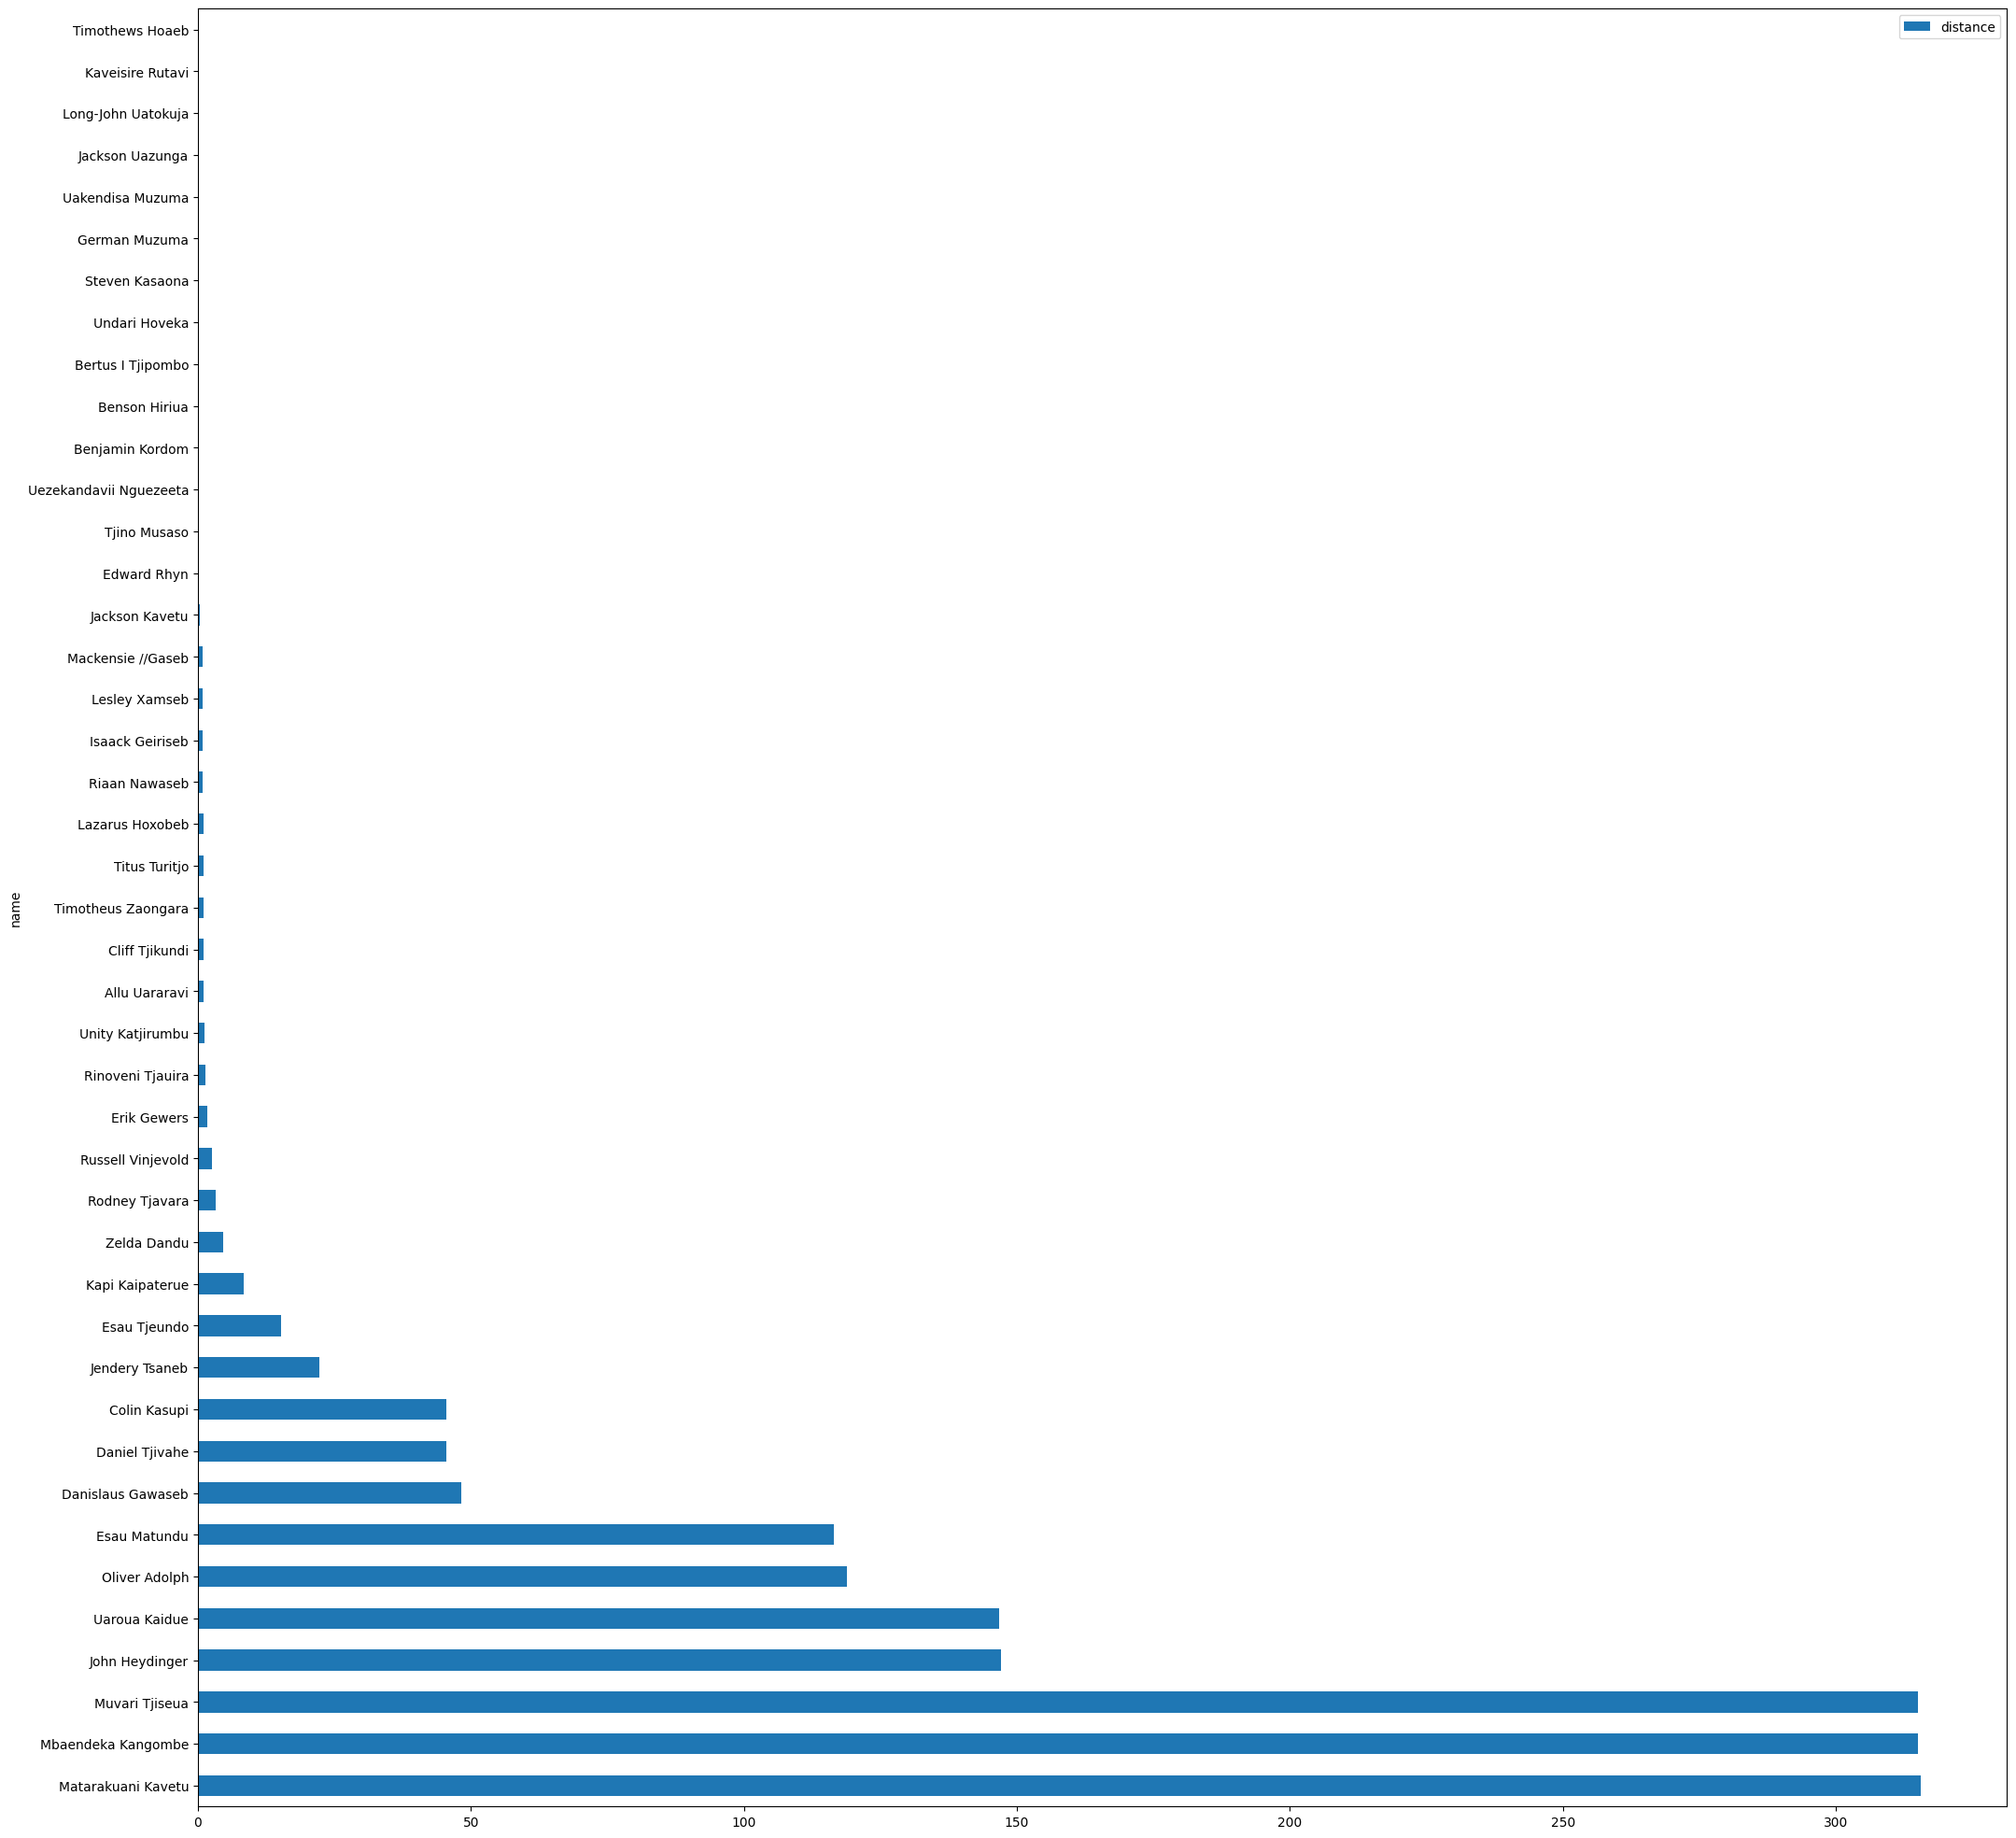

In [115]:
df.plot(kind='barh', x='name', y=['distance'], fontsize=10, figsize=[25,25])

<Axes: >

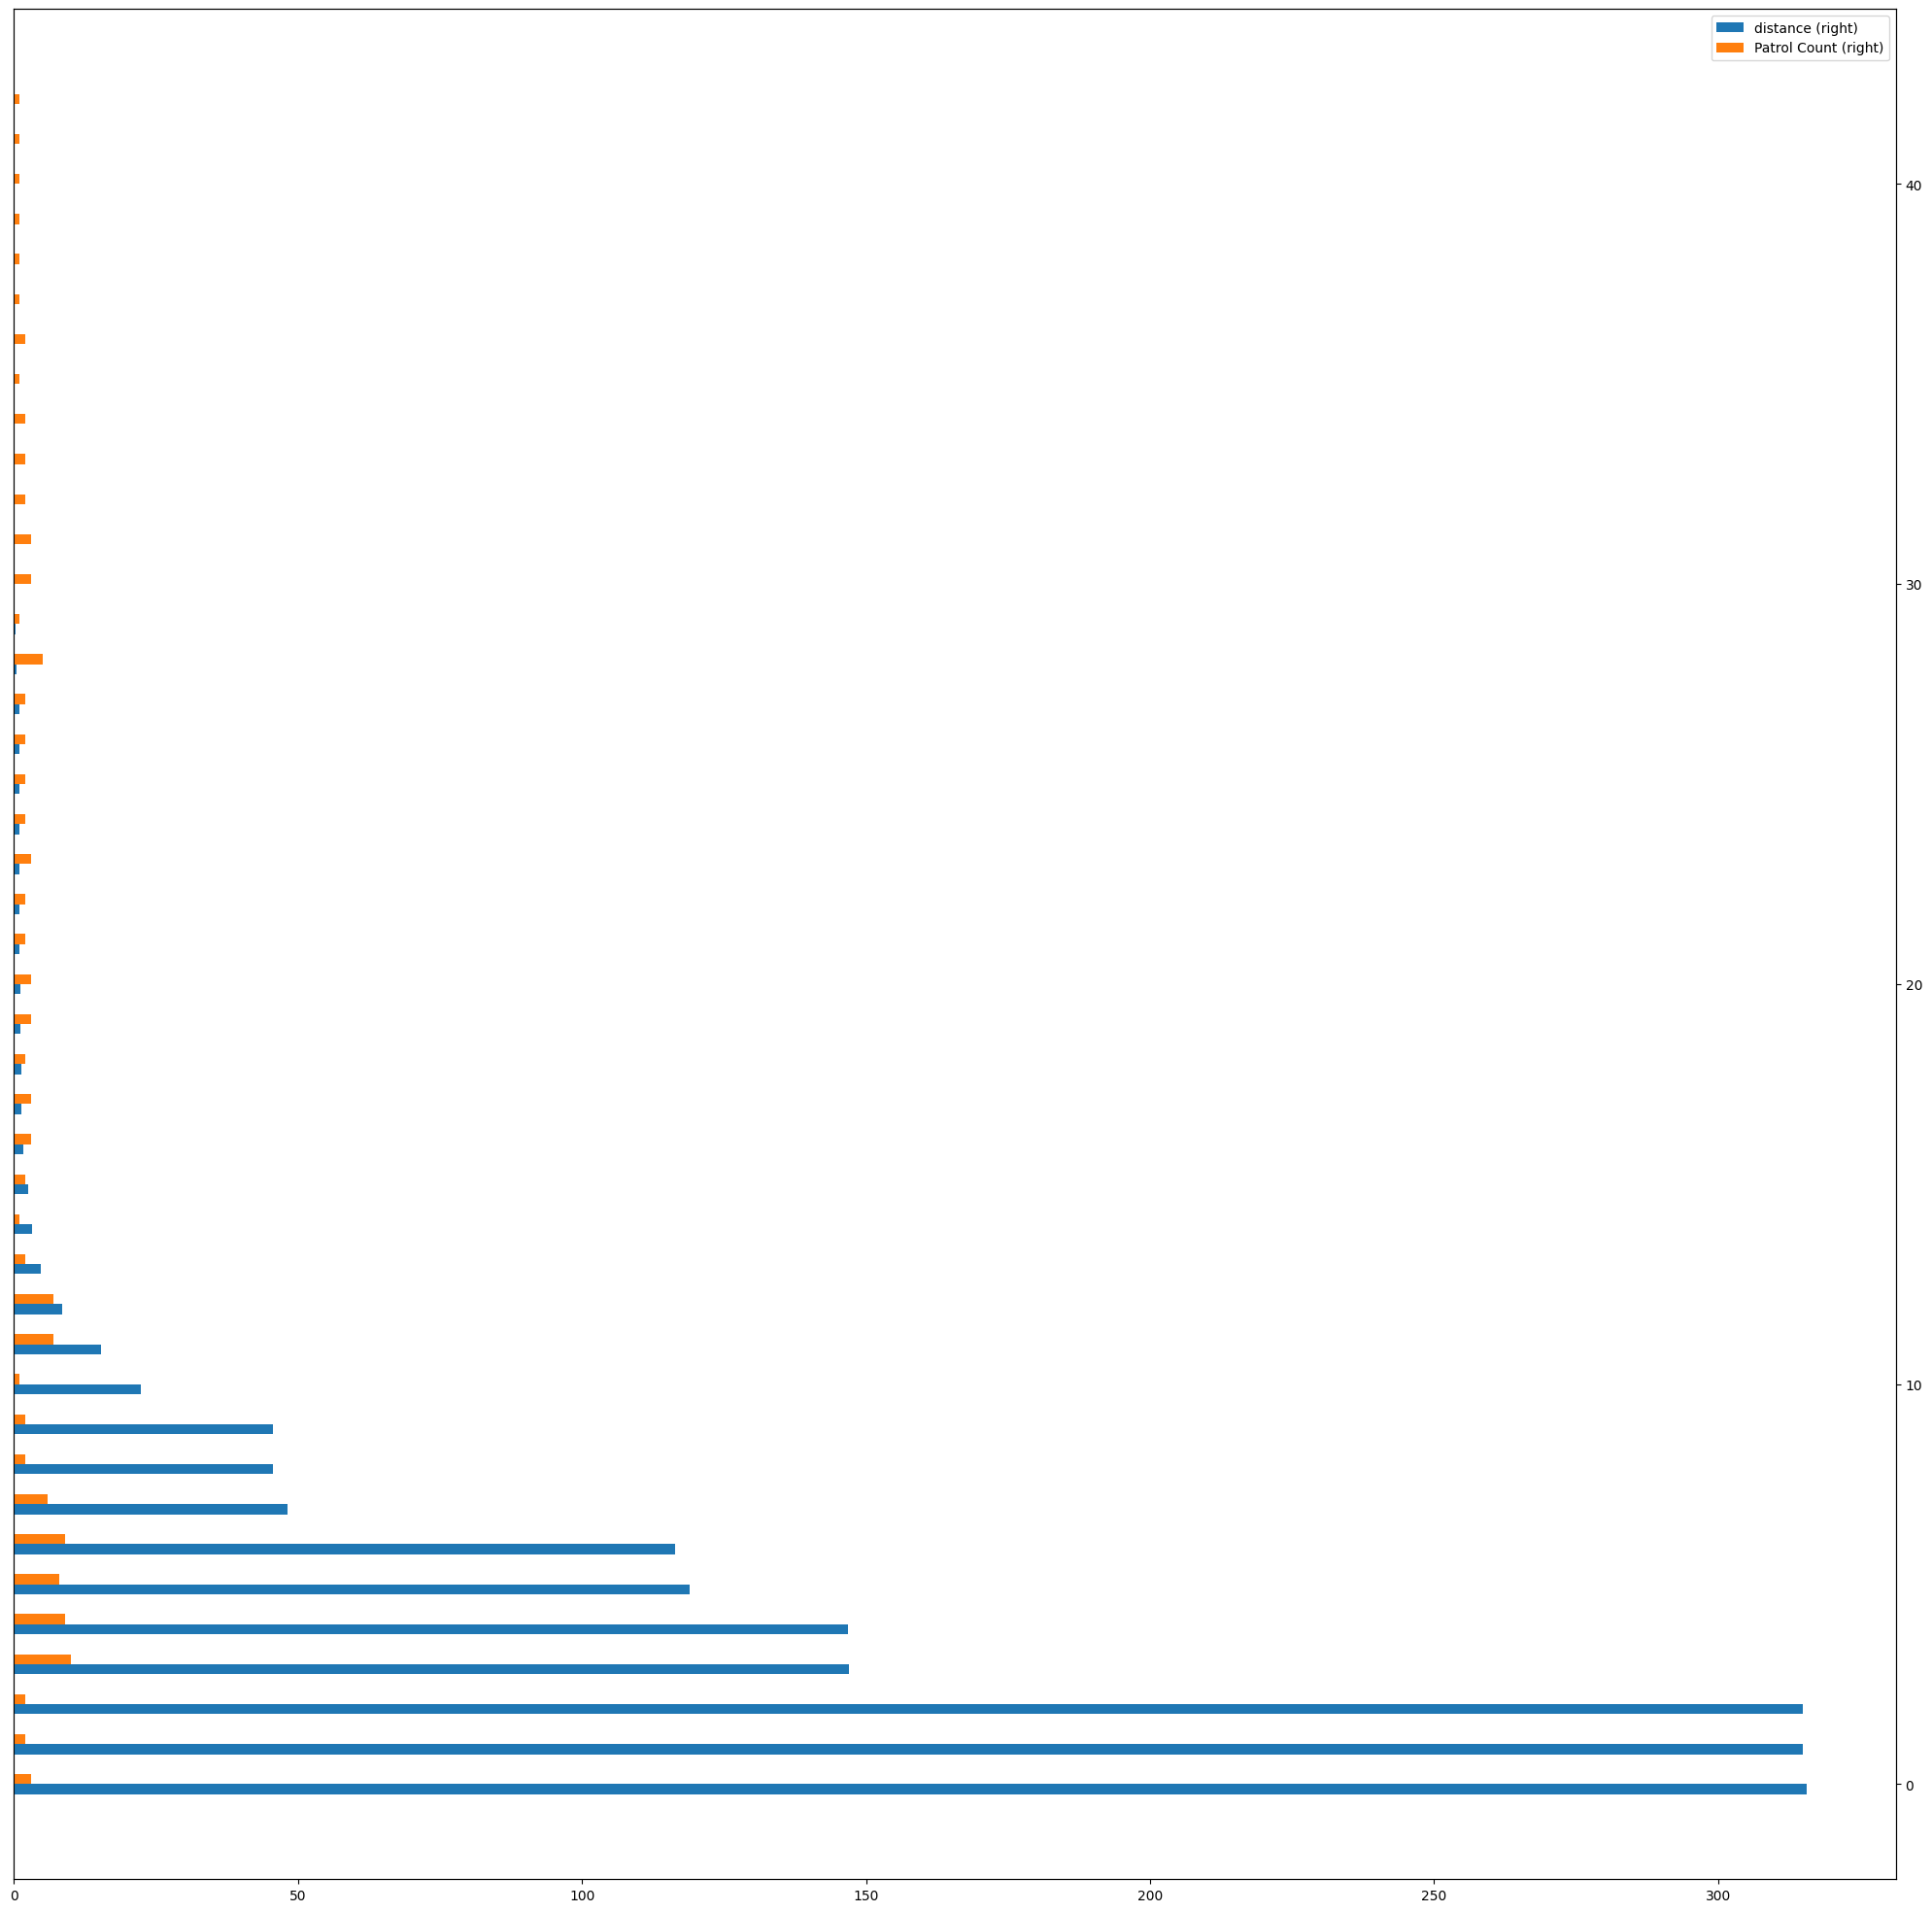

In [116]:
df.plot(kind='barh', x='name', y=['distance','Patrol Count'], fontsize=10, figsize=[25,25], secondary_y=True)

<Axes: xlabel='date'>

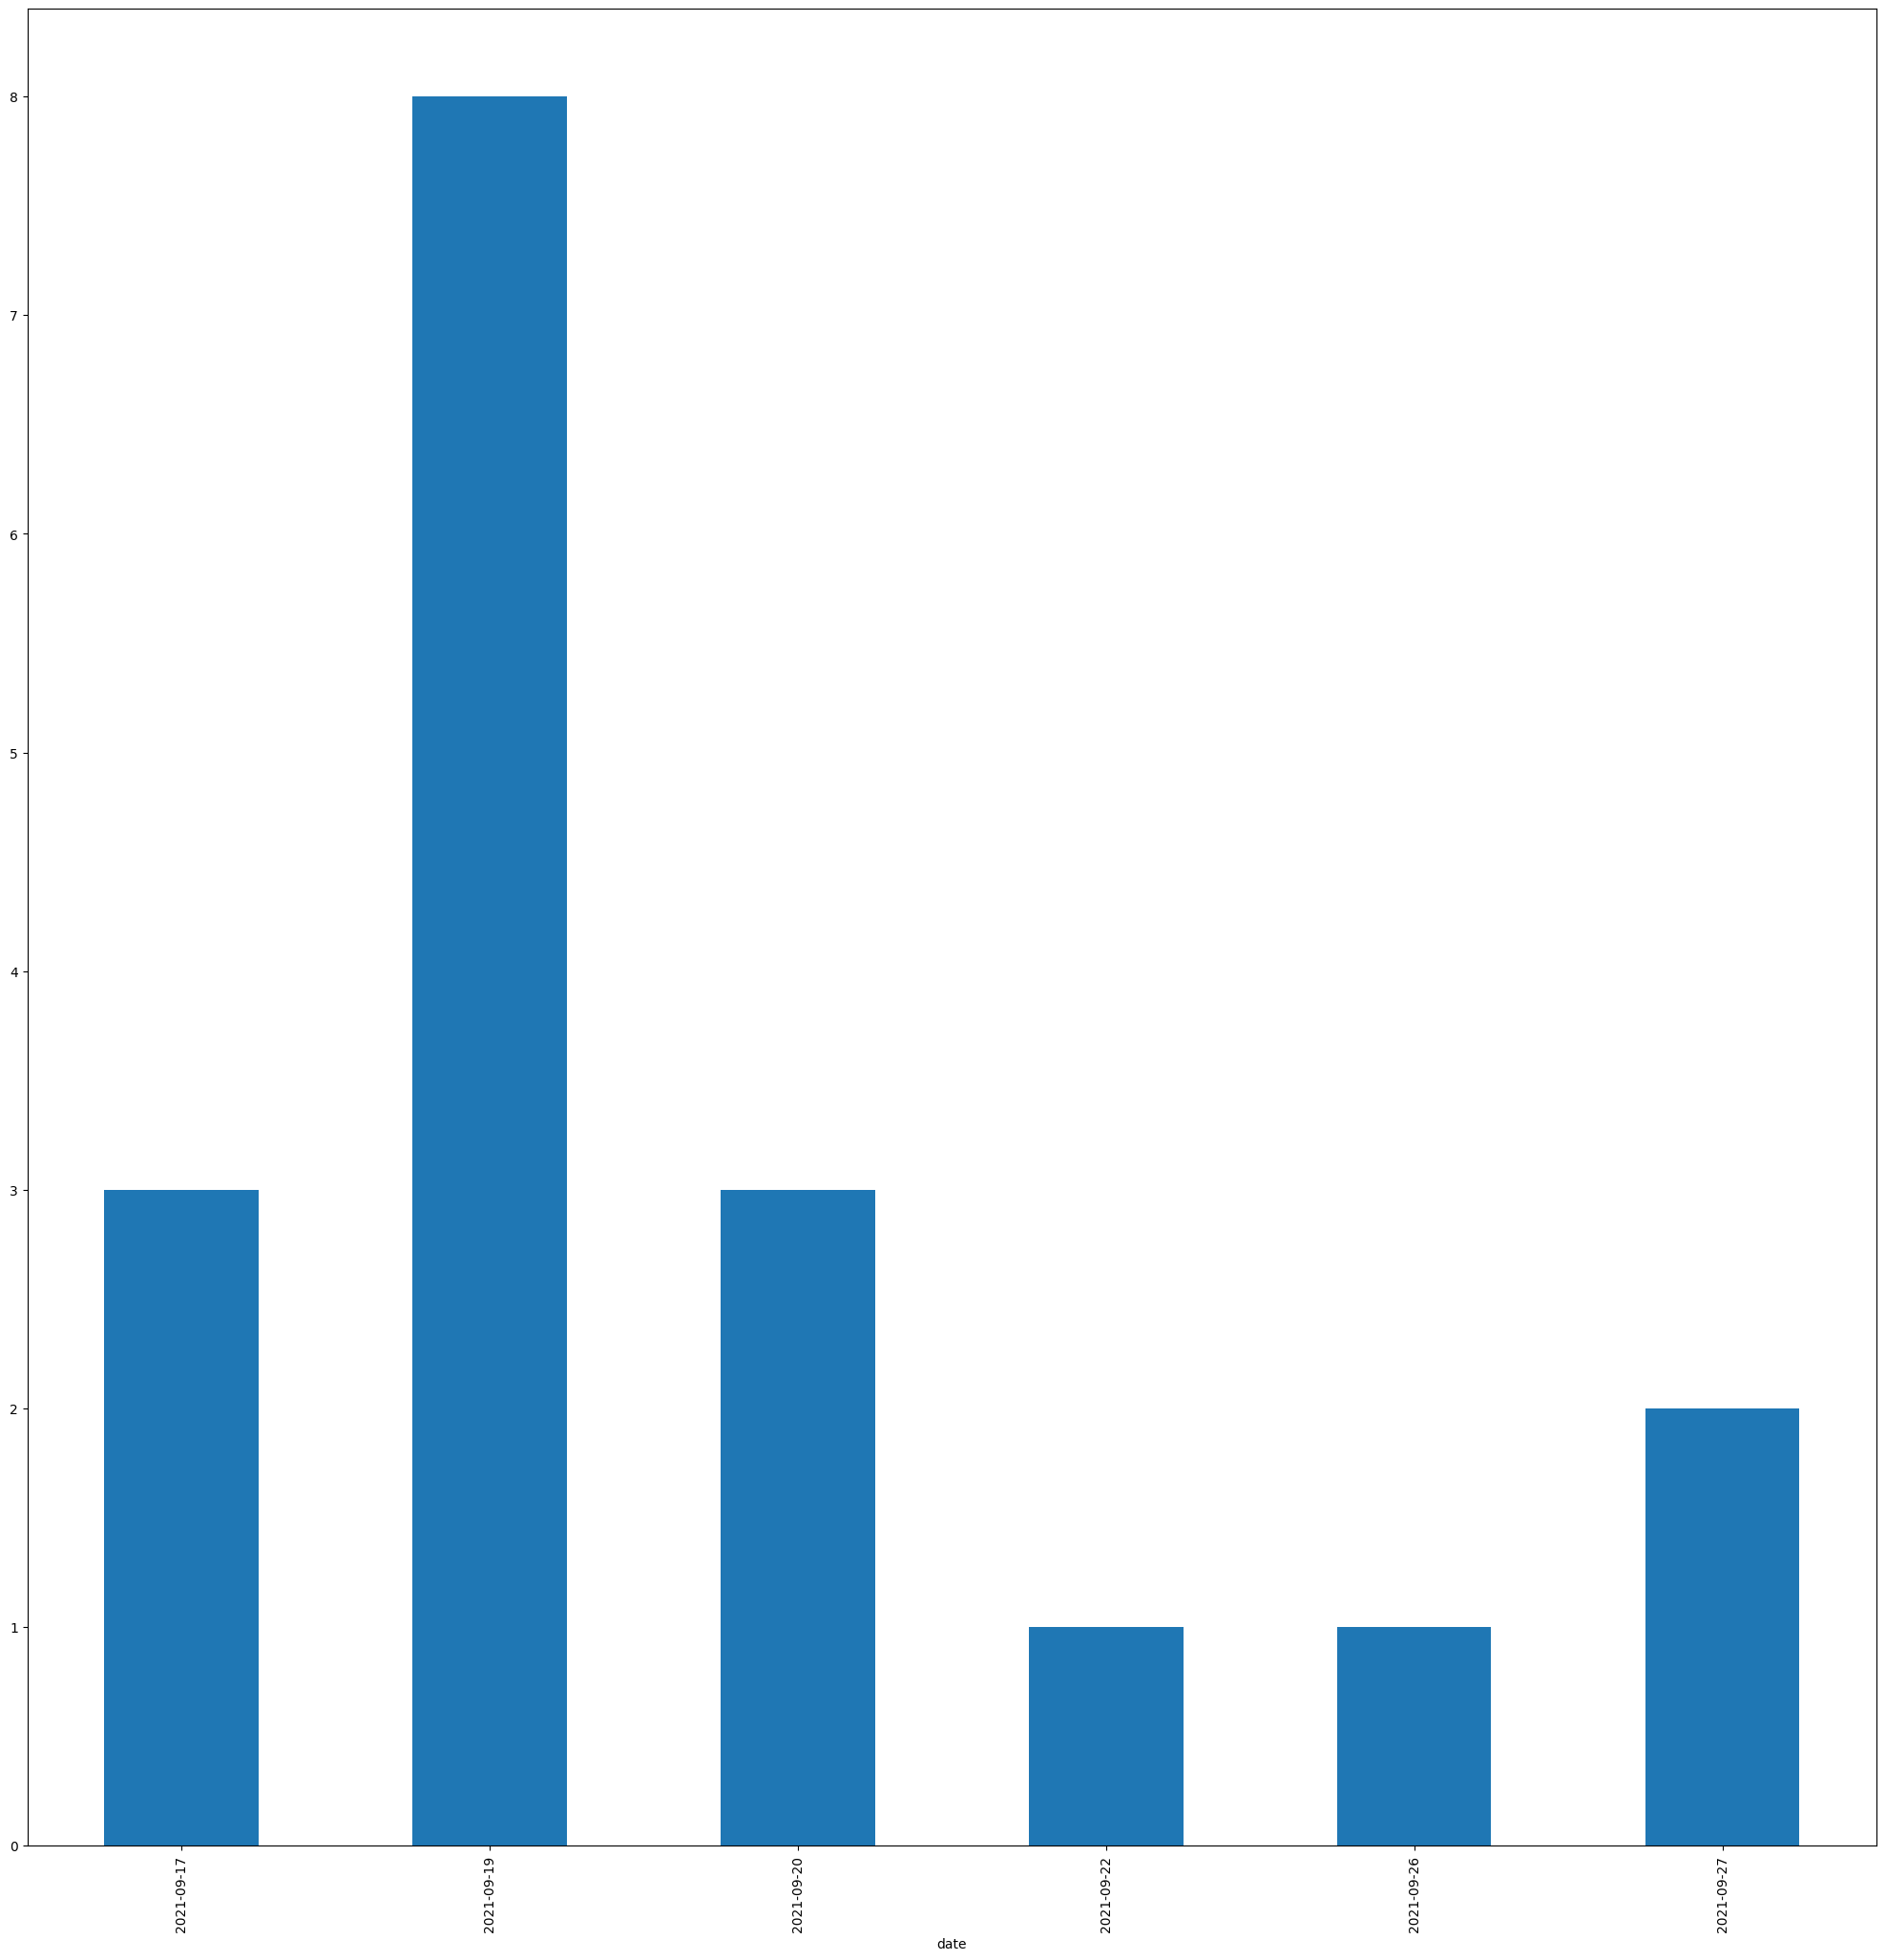

In [125]:
df['date'] = pd.to_datetime(df['First Patrol Start Time '])
df.set_index('date')
#df2 = df.groupby([df['name'], df['date'].dt.date])['Patrol Count'].mean().plot(kind='bar', stacked=True,fontsize=10, figsize=[25,25], )
df.groupby([df['date'].dt.date])['Patrol Count'].mean().plot(kind='bar', stacked=True,fontsize=10, figsize=[25,25], )
#df.plot.bar(stacked=False, x='date', y=['Patrol Count'], fontsize=10, figsize=[25,25], )

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [119]:
df2 = df.pivot(index="date", columns="name", values="Patrol Count")
df2.resample("M").mean()

name        Allu Uararavi  Benjamin Kordom  Benson Hiriua  Bertus I Tjipombo  \
date                                                                           
2021-09-30            3.0              2.0            2.0                2.0   

name        Cliff Tjikundi  Colin Kasupi  Daniel Tjivahe  Danislaus Gawaseb  \
date                                                                          
2021-09-30             3.0           2.0             2.0                6.0   

name        Edward Rhyn  Erik Gewers  ...  Timotheus Zaongara  \
date                                  ...                       
2021-09-30          1.0          3.0  ...                 2.0   

name        Timothews Hoaeb  Titus Turitjo  Tjino Musaso  Uakendisa Muzuma  \
date                                                                         
2021-09-30              1.0            2.0           3.0               1.0   

name        Uaroua Kaidue  Uezekandavii Nguezeeta  Undari Hoveka  \
date                                                               
2021-09-30            9.0                     3.0            1.0   

name        Unity Katjirumbu  Zelda Dandu  
date                                       
2021-09-30               2.0          2.0  

[1 rows x 43 columns]

<Axes: ylabel='date'>

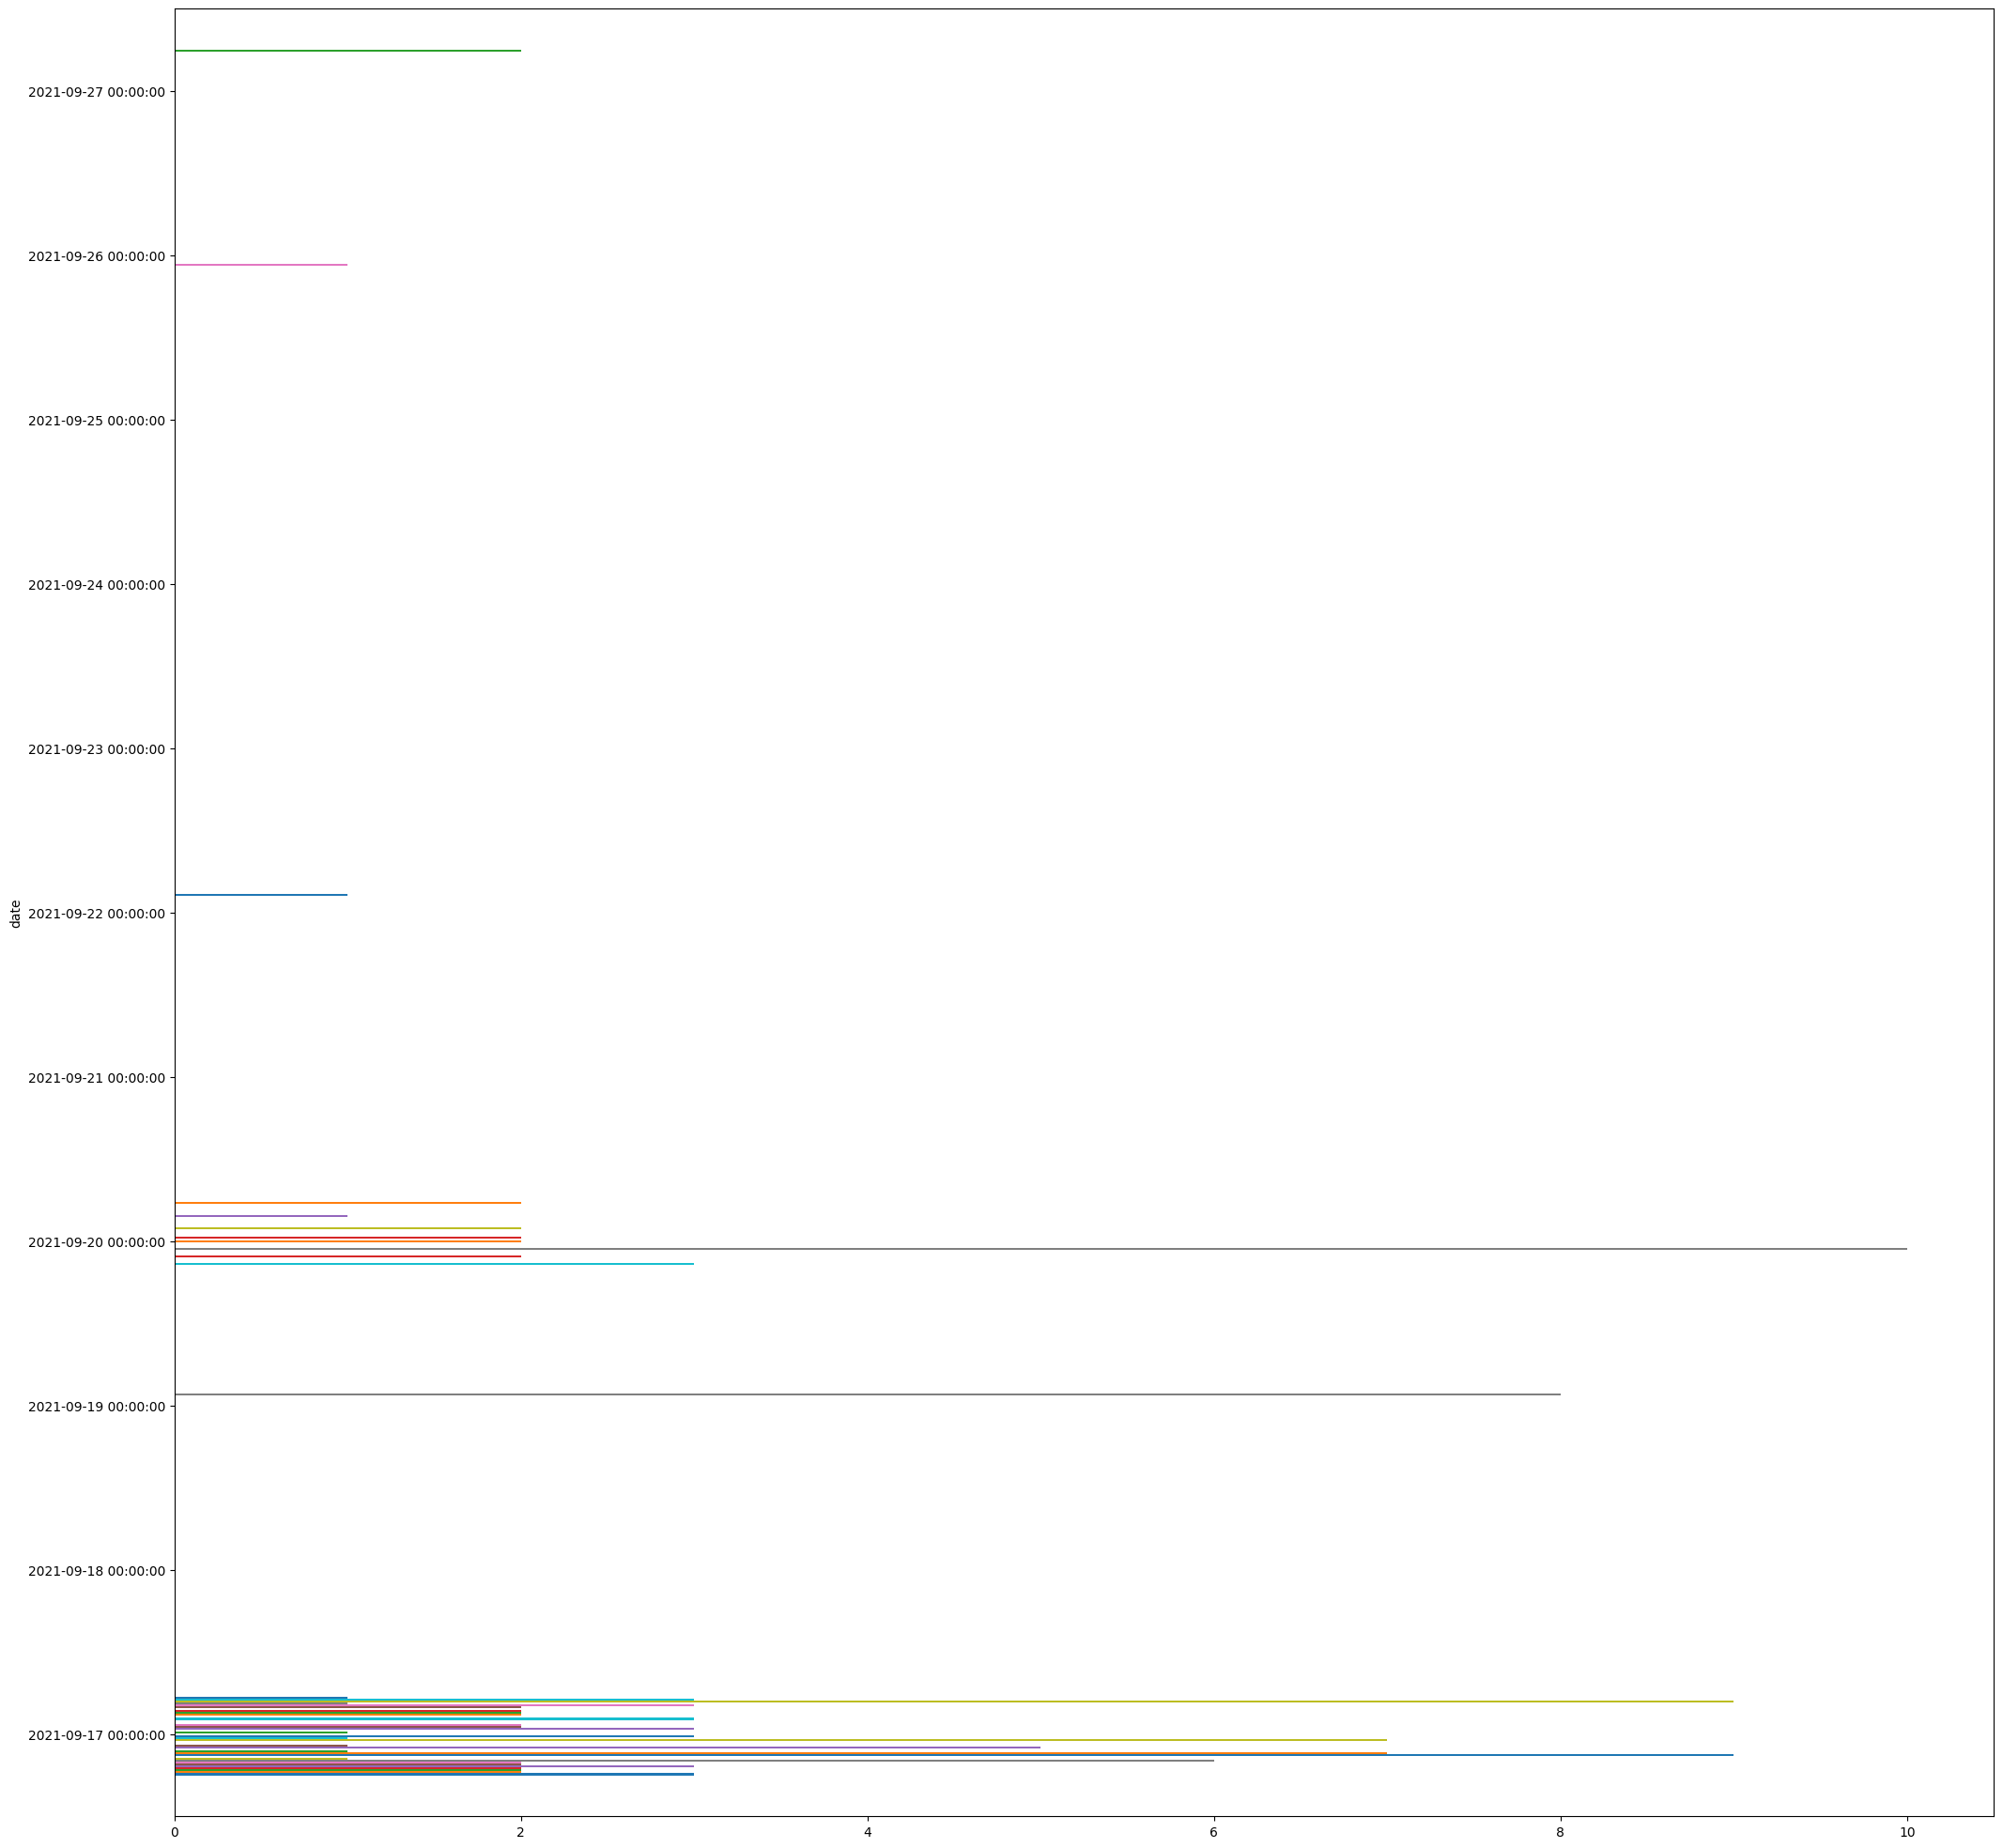

In [123]:
df2.resample("D").mean().plot(legend=False, kind='barh', stacked=False,fontsize=10, figsize=[25,25],  )